In [1]:
import dust
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from astropy.io import ascii
from pylab import ylim

font = {'size'   : 15}
matplotlib.rc('font', **font)

%matplotlib inline

In [2]:
import scatmodels as sm
import cmindex as cm
import constants as c

In [3]:
mie_model = sm.Mie()

In [4]:
GRAIN_RAD = 0.5
tabl = ascii.read("draine_graphite0.5")

In [5]:
WAVEL_UVOPT  = tabl["w(micron)"] # um, Draine's wavelengths
ENERGY_UVOPT = c.kev2lam() / (WAVEL_UVOPT * 1.e-4) # keV

HIGH_ENERGY  = np.linspace(0.1, 20.0, 30) # keV, 30 values between 0.1 and 20 keV 

Show efficiencies for UV/Optical wavelengths

In [6]:
qext_uvopt_gra = mie_model.Qext( E=ENERGY_UVOPT, a=GRAIN_RAD, cm=cm.CmGraphite() )
qsca_uvopt_gra = mie_model.Qsca( E=ENERGY_UVOPT, a=GRAIN_RAD, cm=cm.CmGraphite() )

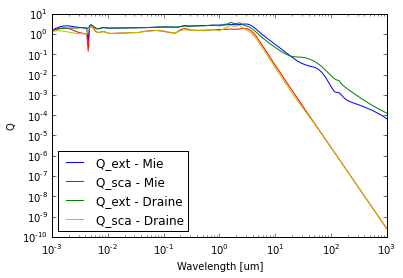

In [7]:
plt.plot( WAVEL_UVOPT, qext_uvopt_gra, 'b-', label='Q_ext - Mie' )
plt.plot( WAVEL_UVOPT, qsca_uvopt_gra, 'r-', label='Q_sca - Mie' ) 
plt.plot( WAVEL_UVOPT, tabl["Q_abs"] + tabl["Q_sca"], "g-", label="Q_ext - Draine")
plt.plot( WAVEL_UVOPT, tabl["Q_sca"], "y-", label="Q_sca - Draine")

plt.loglog()
plt.xlabel('Wavelength [um]')
plt.ylabel('Q')
plt.legend(loc='lower left')
plt.figure(figsize=(20,10))

plt.show()

Now do the high energy

In [8]:
qext_high_sil = mie_model.Qext( E=HIGH_ENERGY, a=GRAIN_RAD, cm=cm.CmSilicate() )
qsca_high_sil = mie_model.Qsca( E=HIGH_ENERGY, a=GRAIN_RAD, cm=cm.CmSilicate() )

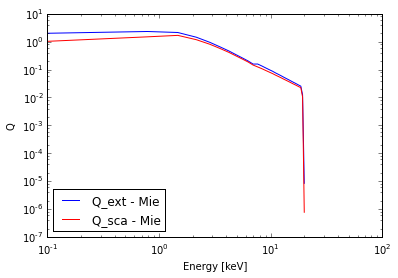

In [9]:
plt.plot( HIGH_ENERGY, qext_high_sil, 'b-', label='Q_ext - Mie' )
plt.plot( HIGH_ENERGY, qsca_high_sil, 'r-', label='Q_sca - Mie' )

plt.loglog()
plt.xlabel('Energy [keV]')
plt.ylabel('Q')
plt.legend(loc='lower left')

plt.show()